# PROJECT EBOLA

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
import seaborn as sns

In [2]:
df=pd.read_csv('ebola_2014_2016_clean.csv')
df.shape

(2485, 10)

In [3]:
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [4]:
df.replace("?", np.nan, inplace = True)

In [5]:
df.fillna(float(0),inplace=True)

In [6]:
df.dtypes

Country                                             object
Date                                                object
No. of suspected cases                             float64
No. of probable cases                              float64
No. of confirmed cases                             float64
No. of confirmed, probable and suspected cases     float64
No. of suspected deaths                            float64
No. of probable deaths                             float64
No. of confirmed deaths                            float64
No. of confirmed, probable and suspected deaths    float64
dtype: object

In [7]:
a=df['Country'].unique()

In [8]:
lat=[]
lon=[]
for i in a :
    address = i
    geolocator = Nominatim()
    location = geolocator.geocode(address,timeout=100)
    latitude = location.latitude
    lat.append(latitude)
    longitude = location.longitude
    lon.append(longitude)
    print('Latitude and longitude of '+address+' are {}, {}.'.format(latitude, longitude))
    
print("")    
print(lat) 
print(lon)
    

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


Latitude and longitude of Guinea are 10.7226226, -10.7083587.
Latitude and longitude of Nigeria are 9.6000359, 7.9999721.
Latitude and longitude of Sierra Leone are 8.6400349, -11.8400269.
Latitude and longitude of Liberia are 5.7499721, -9.3658524.
Latitude and longitude of Senegal are 14.4750607, -14.4529612.
Latitude and longitude of United States of America are 39.7837304, -100.4458825.
Latitude and longitude of Spain are 39.3262345, -4.8380649.
Latitude and longitude of Mali are 16.3700359, -2.2900239.
Latitude and longitude of United Kingdom are 54.7023545, -3.2765753.
Latitude and longitude of Italy are 42.6384261, 12.674297.

[10.7226226, 9.6000359, 8.6400349, 5.7499721, 14.4750607, 39.7837304, 39.3262345, 16.3700359, 54.7023545, 42.6384261]
[-10.7083587, 7.9999721, -11.8400269, -9.3658524, -14.4529612, -100.4458825, -4.8380649, -2.2900239, -3.2765753, 12.674297]


In [9]:
data={'Latitude':lat,
      'Longitude':lon}

In [10]:
corr=pd.DataFrame(data)

In [11]:
m = folium.Map(location=[8.7832, 34.5085],zoom_start=2.4,tiles='Stamen Toner')

In [12]:
# instantiate a feature group for the incidents in the dataframe
spots = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(corr.Latitude, corr.Longitude):
    spots.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.2
        )
    )

# add incidents to map
m.add_child(spots)

In [13]:
df.sort_values(by='Date',inplace=True)
df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

In [14]:
df['Date'] = pd.to_datetime(df['Date'])


In [15]:
maindf=df.groupby(['Country','Year']).sum()

In [16]:
maindf.reset_index(inplace=True)
maindf.sort_values(by='Year',inplace=True)

In [17]:
maindf

,Country,Year,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014,2101.0,7794.0,56295.0,66190.0,45.0,7388.0,31014.0,40462.0
17,Sierra Leone,2014,31274.0,4230.0,156787.0,192291.0,2136.0,4818.0,41981.0,51945.0
14,Senegal,2014,4.0,0.0,37.0,41.0,0.0,0.0,0.0,0.0
11,Nigeria,2014,10.0,38.0,717.0,765.0,0.0,38.0,265.0,303.0
8,Mali,2014,0.0,18.0,111.0,129.0,0.0,5.0,21.0,101.0
20,Spain,2014,0.0,0.0,26.0,26.0,0.0,0.0,0.0,0.0
25,United States of America,2014,0.0,0.0,99.0,99.0,0.0,0.0,25.0,25.0
5,Liberia,2014,74602.0,59688.0,72254.0,210796.0,5929.0,8673.0,11385.0,95625.0
6,Liberia,2015,1131795.0,412533.0,693322.0,2237646.0,4.0,0.0,15548.0,999395.0
23,United Kingdom,2015,0.0,0.0,220.0,214.0,0.0,0.0,0.0,0.0


In [18]:
maindf1=maindf.groupby(['Country']).sum()
maindf1.reset_index(inplace=True)
maindf1

,Country,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,4293.0,100201.0,749622.0,854118.0,45.0,99799.0,461211.0,563069.0
1,Italy,0.0,0.0,141.0,141.0,0.0,0.0,0.0,0.0
2,Liberia,1212033.0,474103.0,768738.0,2459122.0,5933.0,8676.0,26937.0,1099833.0
3,Mali,1.0,239.0,1658.0,1865.0,0.0,5.0,21.0,1427.0
4,Nigeria,10.0,255.0,4840.0,5105.0,0.0,255.0,1784.0,2039.0
5,Senegal,4.0,0.0,254.0,258.0,0.0,0.0,0.0,0.0
6,Sierra Leone,893756.0,67657.0,2041871.0,3003428.0,37054.0,50786.0,797984.0,888834.0
7,Spain,0.0,0.0,243.0,243.0,0.0,0.0,0.0,0.0
8,United Kingdom,0.0,0.0,221.0,215.0,0.0,0.0,0.0,0.0
9,United States of America,0.0,0.0,967.0,967.0,0.0,0.0,242.0,242.0


In [19]:
l1=[]
for i in maindf1['Country']:
    l1.append(i) 
    
l2=[]
   
for j in maindf1['No. of confirmed cases']:
    l2.append(j)

l3=[]

for k in maindf1['No. of confirmed deaths']:
    l3.append(k)

print("ACCORDING TO THIS DATA :")
print("")
print("The Fatality rate in different countries might not be exactly true because there was much data missing/unavailable data in the dataset(due to some missing/unavailable data of confirmed deaths and confirmed cases)")
print('But it can give the an idea of fatality rate in different countries(which have some sufficient amount of data).')
print("")
    
for  r,p,q in zip(l1,l2,l3):      
    print('From 2014-2016 there were total number of ',p,'cases of Ebola in ',r,'out of which ',q,'number of people died due to Ebola')
    print("The Fatality rate of Ebola disease in",r,"was :")
    fr=(q/p)*100
    if(fr<25):
        print(fr,'%',' (the fatality rate is low might be because of missing/unavailable data)')
        print('')
    else:
        print(fr,'%')
        print('')
    
p1=maindf1['No. of confirmed deaths'].sum()
p2=maindf1['No. of confirmed cases'].sum()
print('The fatality rate of Ebola disease in world from 2014-2016 accroding to this data is: ',(p1/p2)*100)

ACCORDING TO THIS DATA :

The Fatality rate in different countries might not be exactly true because there was much data missing/unavailable data in the dataset(due to some missing/unavailable data of confirmed deaths and confirmed cases)
But it can give the an idea of fatality rate in different countries(which have some sufficient amount of data).

From 2014-2016 there were total number of  749622.0 cases of Ebola in  Guinea out of which  461211.0 number of people died due to Ebola
The Fatality rate of Ebola disease in Guinea was :
61.525809007739895 %

From 2014-2016 there were total number of  141.0 cases of Ebola in  Italy out of which  0.0 number of people died due to Ebola
The Fatality rate of Ebola disease in Italy was :
0.0 %  (the fatality rate is low might be because of missing/unavailable data)

From 2014-2016 there were total number of  768738.0 cases of Ebola in  Liberia out of which  26937.0 number of people died due to Ebola
The Fatality rate of Ebola disease in Liberia 

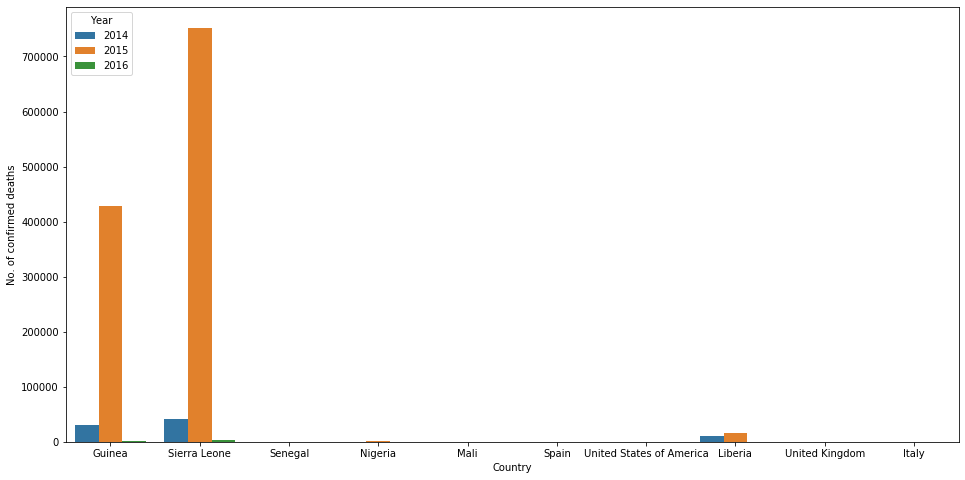

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(x="Country", y="No. of confirmed deaths", hue='Year', data=maindf)
plt.show()

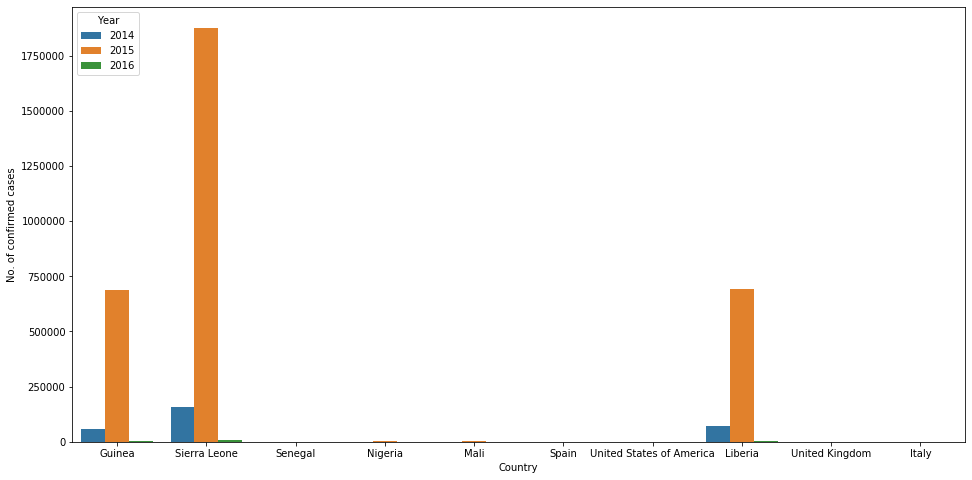

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x="Country", y="No. of confirmed cases", hue='Year', data=maindf)
plt.show()

Text(0.5, 0, '\n No. of confirmed, probable and suspected cases (2014-2016)')

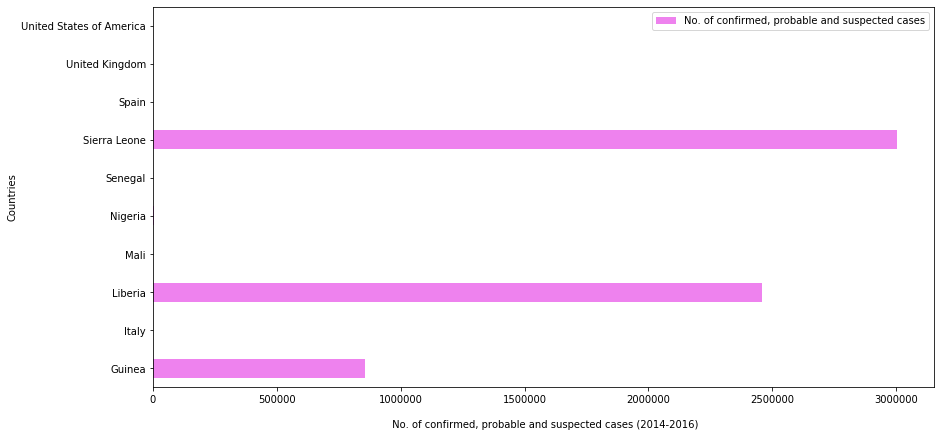

In [22]:
maindf1.plot(kind='barh',x='Country',y='No. of confirmed, probable and suspected cases',figsize=(14,7),color='violet')
plt.ylabel('Countries')
plt.xlabel('\n No. of confirmed, probable and suspected cases (2014-2016)')

Text(0.5, 0, '\n No. of confirmed, probable and suspected deaths (2014-2016)')

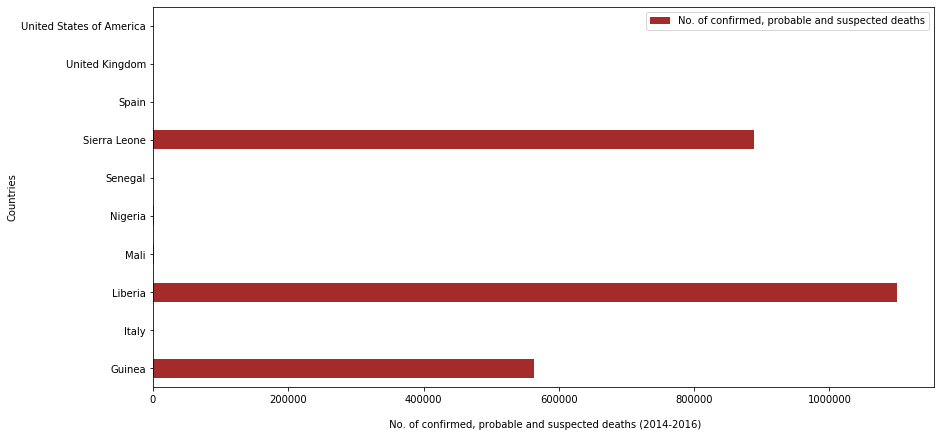

In [23]:
maindf1.plot(kind='barh',x='Country',y='No. of confirmed, probable and suspected deaths',figsize=(14,7),color='brown')
plt.ylabel('Countries')
plt.xlabel('\n No. of confirmed, probable and suspected deaths (2014-2016)')

In [25]:
guinea=df[df["Country"]=="Guinea"]
guinea.sort_values(by='Date',inplace=True)
guinea.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Year,Month,Day
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0,2014,08,29
7,Guinea,2014-09-05,56.0,152.0,604.0,812.0,3.0,152.0,362.0,517.0,2014,09,05
10,Guinea,2014-09-08,47.0,151.0,664.0,862.0,4.0,151.0,400.0,555.0,2014,09,08
14,Guinea,2014-09-12,32.0,151.0,678.0,861.0,4.0,150.0,403.0,557.0,2014,09,12
21,Guinea,2014-09-16,31.0,162.0,743.0,936.0,4.0,162.0,429.0,595.0,2014,09,16


In [26]:
gm=guinea.groupby(['Month']).sum()
gm.reset_index(inplace=True)
gm

,Month,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,01,312.0,6363.0,52936.0,59609.0,0.0,6363.0,32303.0,38665.0
1,02,216.0,6616.0,48515.0,55347.0,0.0,6616.0,29849.0,36465.0
2,03,349.0,7165.0,53174.0,60688.0,0.0,7165.0,32873.0,40038.0
3,04,230.0,6218.0,46943.0,53391.0,0.0,6218.0,29115.0,35333.0
4,05,236.0,8759.0,66958.0,75957.0,0.0,8763.0,41671.0,50434.0
5,06,277.0,9371.0,71393.0,81041.0,0.0,9371.0,44514.0,53885.0
6,07,242.0,10351.0,76027.0,86620.0,0.0,10351.0,47321.0,57672.0
7,08,166.0,9633.0,70445.0,80244.0,2.0,9633.0,43818.0,53453.0
8,09,377.0,11216.0,79426.0,91019.0,35.0,11214.0,49169.0,60418.0
9,10,993.0,9579.0,68754.0,79326.0,8.0,9175.0,40433.0,51631.0


Text(0, 0.5, 'No. of confirmed cases')

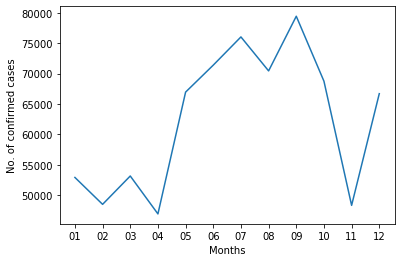

In [27]:
sns.lineplot(x='Month',y='No. of confirmed cases',data=gm)
plt.xlabel('Months')
plt.ylabel('No. of confirmed cases')


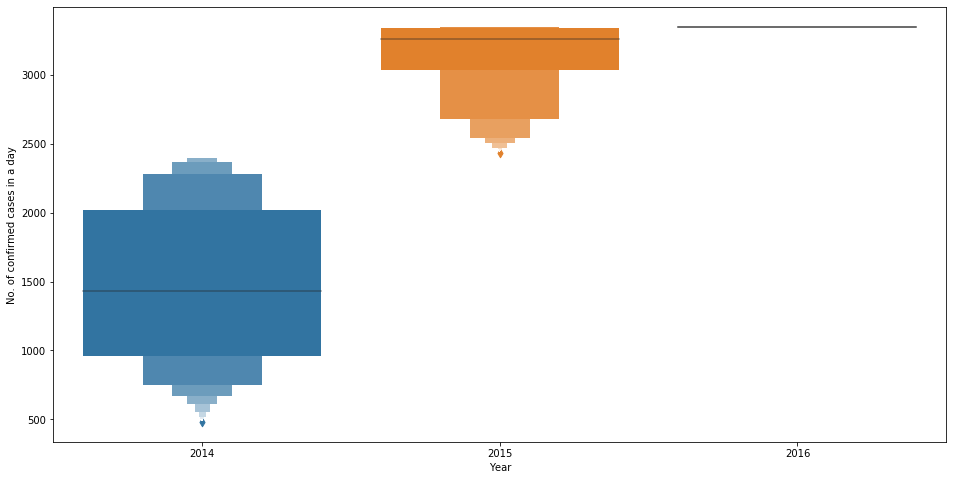

In [42]:
plt.figure(figsize=(16,8))
sns.boxenplot(x='Year',y='No. of confirmed cases',data=guinea)
plt.ylabel('No. of confirmed cases in a day')
plt.show()

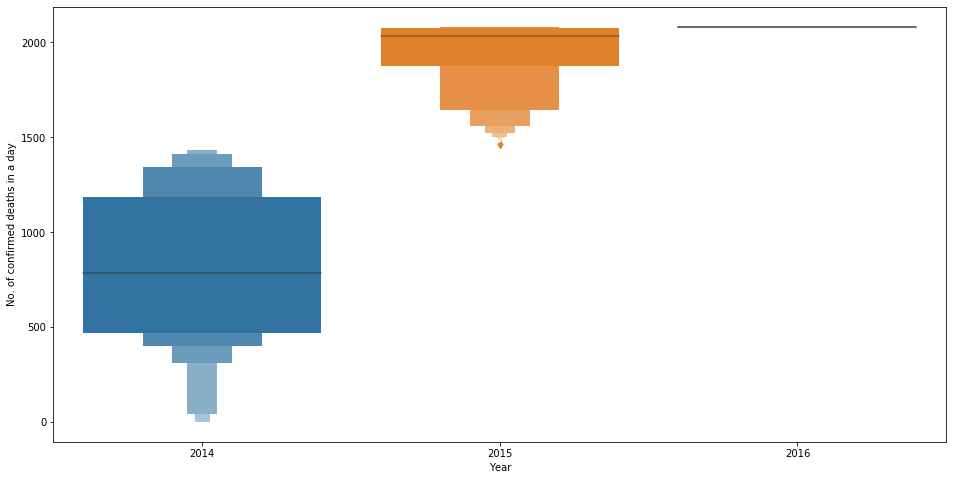

In [41]:
plt.figure(figsize=(16,8))
sns.boxenplot(x='Year',y='No. of confirmed deaths',data=guinea)
plt.ylabel('No. of confirmed deaths in a day')
plt.show()

<Figure size 1152x576 with 0 Axes>

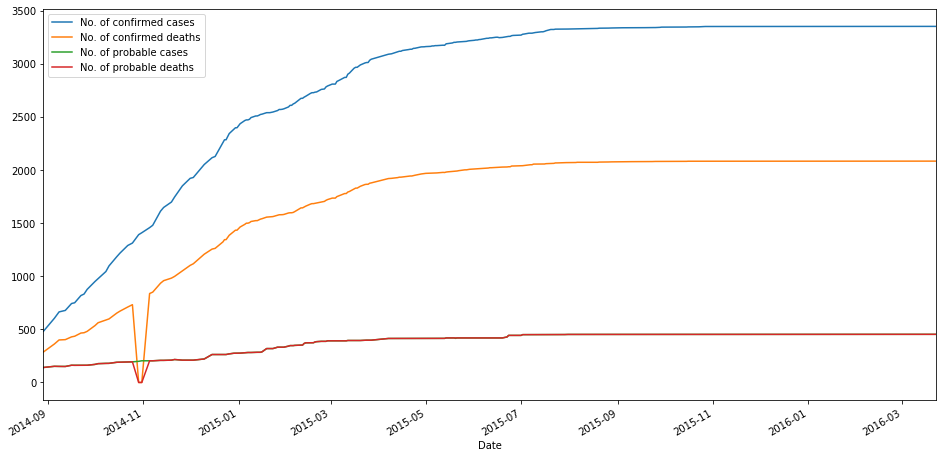

In [30]:
plt.figure(figsize=(16,8))
guinea.plot(kind='line',x='Date',y=['No. of confirmed cases','No. of confirmed deaths','No. of probable cases','No. of probable deaths'],figsize=(16,8))

In [31]:
sl=df[df["Country"]=="Sierra Leone"]
sl.sort_values(by='Date',inplace=True)
sl.head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Year,Month,Day
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0,2014,08,29
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0,2014,09,05
11,Sierra Leone,2014-09-08,90.0,37.0,1234.0,1361.0,11.0,37.0,461.0,509.0,2014,09,08
15,Sierra Leone,2014-09-12,100.0,37.0,1287.0,1424.0,12.0,34.0,478.0,524.0,2014,09,12
20,Sierra Leone,2014-09-16,119.0,37.0,1464.0,1620.0,11.0,37.0,514.0,562.0,2014,09,16


In [32]:
slm=sl.groupby(['Month']).sum()
slm.reset_index(inplace=True)
slm

,Month,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,01,43778.0,6027.0,164097.0,214046.0,3318.0,4368.0,56956.0,64642.0
1,02,46056.0,5166.0,147079.0,198301.0,2844.0,3744.0,54136.0,60724.0
2,03,55216.0,5166.0,152555.0,212937.0,2844.0,3744.0,59698.0,66286.0
3,04,50983.0,4305.0,128578.0,183866.0,2370.0,3120.0,52573.0,58063.0
4,05,77414.0,6027.0,180629.0,264070.0,3318.0,4368.0,74331.0,82017.0
5,06,88703.0,6314.0,190164.0,285181.0,3476.0,4576.0,78199.0,86251.0
6,07,97774.0,6601.0,199747.0,304122.0,3634.0,4784.0,82318.0,90736.0
7,08,94758.0,6064.0,183565.0,284387.0,3326.0,4402.0,75678.0,83406.0
8,09,105839.0,6610.0,203290.0,315739.0,3565.0,4863.0,83001.0,91429.0
9,10,90196.0,5819.0,177187.0,273202.0,3199.0,4521.0,67492.0,78222.0


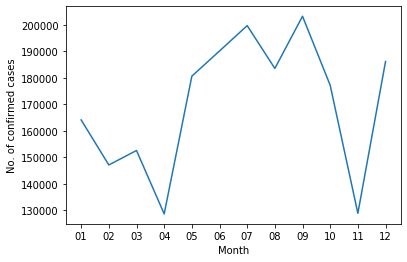

In [33]:
sns.lineplot(x='Month',y='No. of confirmed cases',data=slm)

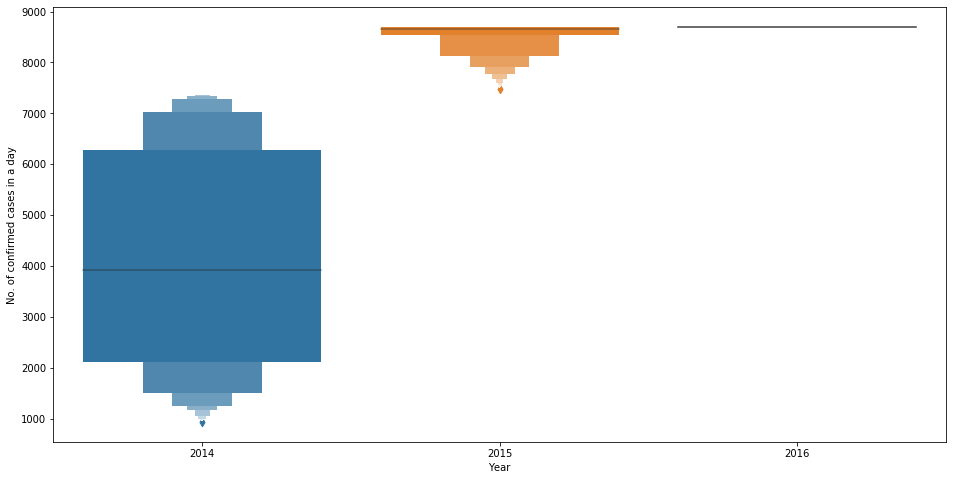

In [40]:
plt.figure(figsize=(16,8))
sns.boxenplot(x='Year',y='No. of confirmed cases',data=sl)
plt.ylabel('No. of confirmed cases in a day')
plt.show()

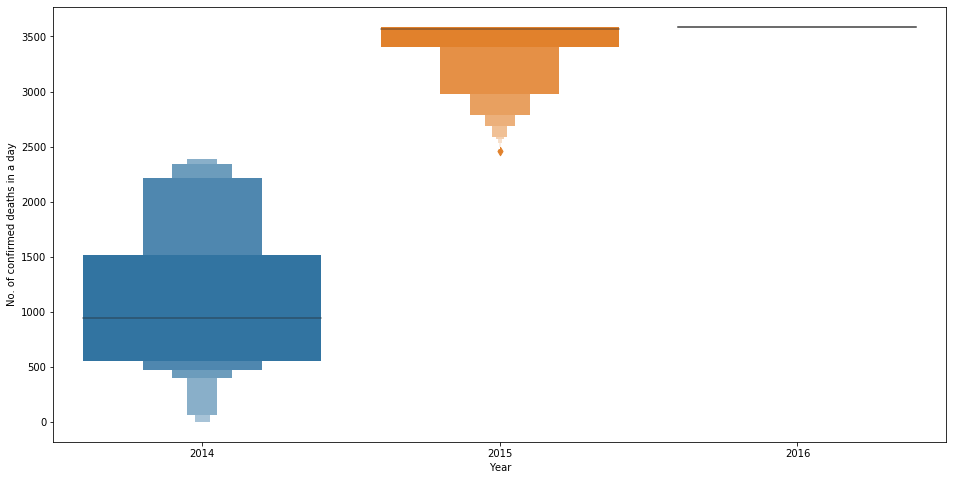

In [39]:
plt.figure(figsize=(16,8))
sns.boxenplot(x='Year',y='No. of confirmed deaths',data=sl)
plt.ylabel('No. of confirmed deaths in a day')
plt.show()

<Figure size 1152x576 with 0 Axes>

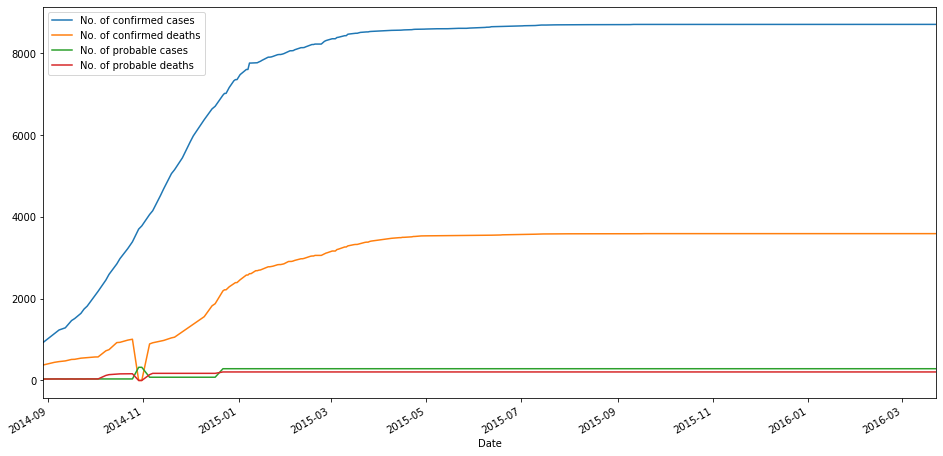

In [36]:
plt.figure(figsize=(16,8))
sl.plot(kind='line',x='Date',y=['No. of confirmed cases','No. of confirmed deaths','No. of probable cases','No. of probable deaths'],figsize=(16,8))

THE END